## IGO15600_IGO15601_IGO15771_IGO16686_IGO17402_IGO17543_combined - Slc4a11-MCD Rosa26-mTmG and Hopx-MACD Rosa26-mTmG traced
7/31/2025 - Data generated from Slc4a11-MCD R26-mTmG mice given Tamoxifen at either 6 weeks or 12 weeks and traced for 2 weeks and Hopx-MACD R26-mTmG mice at 12 weeks. Data submitted by Chun-Hao/EB analyzed by Jason
Analyze global run on cellranger v6 data and create h5_ad files for further analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import math
import matplotlib
from matplotlib import pyplot as plt

from pathlib import Path
import anndata

In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
#plt.rcParams['figure.figsize'] = (3,4)

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
np.random.seed(1573)   #fix so we can reproduce later

In [4]:
#Path("./figures").mkdir(parents=True, exist_ok=True) # generate figures here
Path("./write").mkdir(parents=True, exist_ok=True) # write h5ad here

In [5]:
adata1 = anndata.read('../IGO15600/write/allmice-tumor-IGO15600.h5ad')
adata2 = anndata.read('../IGO15601/write/allmice-tumor-IGO15601.h5ad')
adata3 = anndata.read('../IGO15771/write/allmice-tumor-IGO15771.h5ad')
adata4 = anndata.read('../IGO16686/write/allmice-tumor-IGO16686-nointrons.h5ad')
adata5 = anndata.read('../IGO17402/write/allmice-tumor-IGO17402.h5ad')
adata6 = anndata.read('../IGO17543/write/allmice-tumor-IGO17543.h5ad')

/Users/chanj2/opt/miniconda3/envs/scbackup3/lib/python3.11/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup3/lib/python3.11/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup3/lib/python3.11/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup3/lib/python3.11/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup3/lib/python3.11/site-packages/ann

In [6]:
adata = adata1.concatenate(adata2, adata3, adata4, adata5, adata6, join='inner', batch_categories=['14wk', '8wk','14wk2','12wk_3d','6wk_3d','12wk_14d'])
adata.uns['log1p'] = {}
adata.uns['log1p']['base'] = None

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_32126/4211595986.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata1.concatenate(adata2, adata3, adata4, adata5, adata6, join='inner', batch_categories=['14wk', '8wk','14wk2','12wk_3d','6wk_3d','12wk_14d'])


## Now select the traced mice (ie remove carrier cells)

In [7]:
adata.obs.Classification.value_counts()

Classification
BD1940_B0304_mKate2+               1278
BF1303_B0301_GFP+                   811
BQ1152_B0309                        551
BQ1920_B0308                        550
BA1624_B0305_GFP+_Carrier           547
BQ1151_B0308                        546
BH1094_B0302_GFP+                   376
BP1479_B0309                        361
BL1606_B0303                        354
BB1010_mKate+                       262
BL1237_B0302                        239
BD1870_Epcam+                       199
BS1265_B0305                        174
BR1615_B0304                        156
BO1540_B0303                        142
BH1065_B0301_GFP+                   138
BH1290_B0304_GFP+                   138
BD1621_B0302_GFP+                   119
BL1646_B0301                        102
BL1241_B0307                         99
BD1623_B0303_Live+Dump-_Carrier      93
BH1129_B0303_GFP+                    90
BO1535_B0302                         75
BL1124_B0305                         67
BH1066_GFP+              

In [8]:
adata.obs.Group.value_counts()

Group
Hopx_12wk3d         1097
Hopx_12wk_14d        911
12wk_3d              877
6wk3d                575
Carrier               99
Slc4a11_12wk_14d      15
Name: count, dtype: int64

In [9]:
adata = adata[~adata.obs.Classification.isin(['BD1940_B0304_mKate2+','BB1010_mKate+',
                                             'BD1870_Epcam+','BD1623_B0303_Live+Dump-_Carrier','BH1719_Live+Immune-','BA1624_B0305_GFP+_Carrier','BL1241_B0307'])]

## Define sorting groups

In [10]:
adata.obs['Sorting_Groups'] = 'traced'
adata.obs['Sorting_Groups'].value_counts()

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_32126/1794197820.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sorting_Groups'] = 'traced'


Sorting_Groups
traced    5208
Name: count, dtype: int64

In [11]:
adata.obs.Classification.value_counts()

Classification
BF1303_B0301_GFP+    811
BQ1152_B0309         551
BQ1920_B0308         550
BQ1151_B0308         546
BH1094_B0302_GFP+    376
BP1479_B0309         361
BL1606_B0303         354
BL1237_B0302         239
BS1265_B0305         174
BR1615_B0304         156
BO1540_B0303         142
BH1065_B0301_GFP+    138
BH1290_B0304_GFP+    138
BD1621_B0302_GFP+    119
BL1646_B0301         102
BH1129_B0303_GFP+     90
BO1535_B0302          75
BL1124_B0305          67
BH1066_GFP+           61
BL1233_B0306          58
BL1121_B0304          57
BR1128_B0307          28
BR1582_B0306          15
Name: count, dtype: int64

In [12]:
adata.obs[['batch','Group','Classification']].value_counts()

batch     Group             Classification
6wk_3d    Hopx_12wk3d       BQ1152_B0309      551
12wk_14d  Hopx_12wk_14d     BQ1920_B0308      550
6wk_3d    Hopx_12wk3d       BQ1151_B0308      546
12wk_14d  Hopx_12wk_14d     BP1479_B0309      361
12wk_3d   12wk_3d           BL1606_B0303      354
                            BL1237_B0302      239
6wk_3d    6wk3d             BS1265_B0305      174
                            BR1615_B0304      156
                            BO1540_B0303      142
12wk_3d   12wk_3d           BL1646_B0301      102
6wk_3d    6wk3d             BO1535_B0302       75
12wk_3d   12wk_3d           BL1124_B0305       67
                            BL1233_B0306       58
                            BL1121_B0304       57
6wk_3d    6wk3d             BR1128_B0307       28
12wk_14d  Slc4a11_12wk_14d  BR1582_B0306       15
Name: count, dtype: int64

In [13]:
adata.obs['Group'] = adata.obs['batch'].replace('14wk2','14wk')


/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_32126/3002563410.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['Group'] = adata.obs['batch'].replace('14wk2','14wk')


In [14]:
adata.obs['Group'] = adata.obs['Group'].cat.add_categories(['Hopx_12wk3d','Hopx_12wk14d','Slc4a11_12wk14d'])
adata.obs.loc[adata.obs.Classification.isin(['BQ1151_B0308',
                                                   'BQ1152_B0309']),'Group'] = 'Hopx_12wk3d'
adata.obs.loc[adata.obs.Classification.isin(['BP1479_B0309',
                                                   'BQ1920_B0308']),'Group'] = 'Hopx_12wk14d'
adata.obs.loc[adata.obs.Classification.isin(['BR1582_B0306',
                                                   ]),'Group'] = 'Slc4a11_12wk14d'

In [15]:
adata.obs[['Group','Classification']].value_counts()

Group            Classification   
14wk             BF1303_B0301_GFP+    811
Hopx_12wk3d      BQ1152_B0309         551
Hopx_12wk14d     BQ1920_B0308         550
Hopx_12wk3d      BQ1151_B0308         546
8wk              BH1094_B0302_GFP+    376
Hopx_12wk14d     BP1479_B0309         361
12wk_3d          BL1606_B0303         354
                 BL1237_B0302         239
6wk_3d           BS1265_B0305         174
                 BR1615_B0304         156
                 BO1540_B0303         142
8wk              BH1065_B0301_GFP+    138
                 BH1290_B0304_GFP+    138
14wk             BD1621_B0302_GFP+    119
12wk_3d          BL1646_B0301         102
8wk              BH1129_B0303_GFP+     90
6wk_3d           BO1535_B0302          75
12wk_3d          BL1124_B0305          67
14wk             BH1066_GFP+           61
12wk_3d          BL1233_B0306          58
                 BL1121_B0304          57
6wk_3d           BR1128_B0307          28
Slc4a11_12wk14d  BR1582_B0306          15

## Set highly variable genes

In [16]:
sc.pp.highly_variable_genes(adata, batch_key='batch')

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [17]:
adata.var.highly_variable = adata.var.highly_variable_intersection

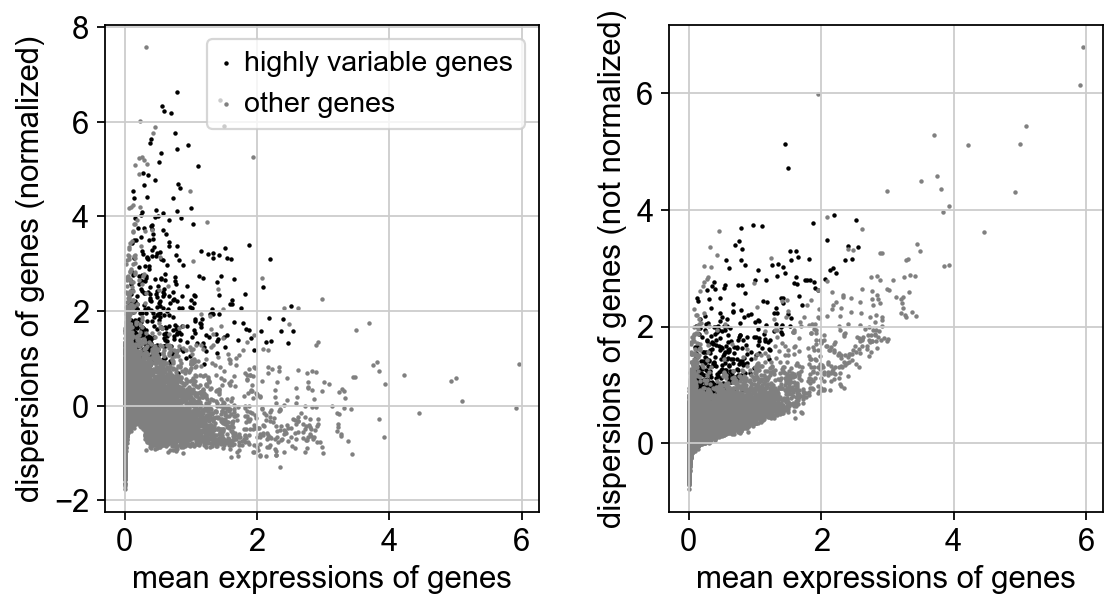

In [18]:
sc.pl.highly_variable_genes(adata)

In [19]:
#Ensure marker genes aren't making an impact to highly variable gene analysis downstream
adata.var.highly_variable['EGFP'] = False
adata.var.highly_variable['mScarlet'] = False
adata.var.highly_variable['Cre'] = False
adata.var.highly_variable['ERT'] = False
adata.var.highly_variable['iDTR'] = False
adata.var.highly_variable['tagBFP'] = False
adata.var.highly_variable['mKate2'] = False
adata.var.highly_variable['Akaluc'] = False
adata.var.highly_variable['tdTomato'] = False
adata.var.highly_variable['CLuc'] = False
adata.var.highly_variable['GLuc'] = False

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_32126/2833403168.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var.highly_variable['EGFP'] = False
/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_32126/283340

In [20]:
adata.raw = adata

In [21]:
adata.write('write/allmice-IGO15600_IGO15601_IGO15771_IGO16686_IGO17402_IGO17543_combined.h5ad', compression='gzip')